![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 29 - Convolutional Neural Network</center>
### <center> 2D CNN - Solution</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/29_CNN/MainCnn2D%20-%20Solution.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [3]:
#-- Imports:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

#-- torch:
import torch

For Colab users:

In [4]:
!wget https://raw.githubusercontent.com/FixelAlgorithmsTeam/FixelCourses/master/MachineLearningMethod/29_CNN/Cnn2D_Aux.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
#-- Record figures during training:
from Cnn2D_Aux import TrainLoop, ValidationLoop, TrainModel

### Exercise
* Load the Fashion-MNIST dataset.
* Use 2D CNN, try to get the high accuracy (above 93% is good).

### Download Fashion-MNIST dataset:

In [6]:
import torchvision
import torchvision.transforms as transforms

oTrainSet = torchvision.datasets.FashionMNIST(root='../../data', train=True,  download=True, transform=transforms.ToTensor())
oTestSet  = torchvision.datasets.FashionMNIST(root='../../data', train=False, download=True, transform=transforms.ToTensor())
oTrainSet.data.shape

torch.Size([60000, 28, 28])

In [7]:
lClasses  = oTrainSet.classes
lClasses

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Plot some examples:

<IPython.core.display.Javascript object>


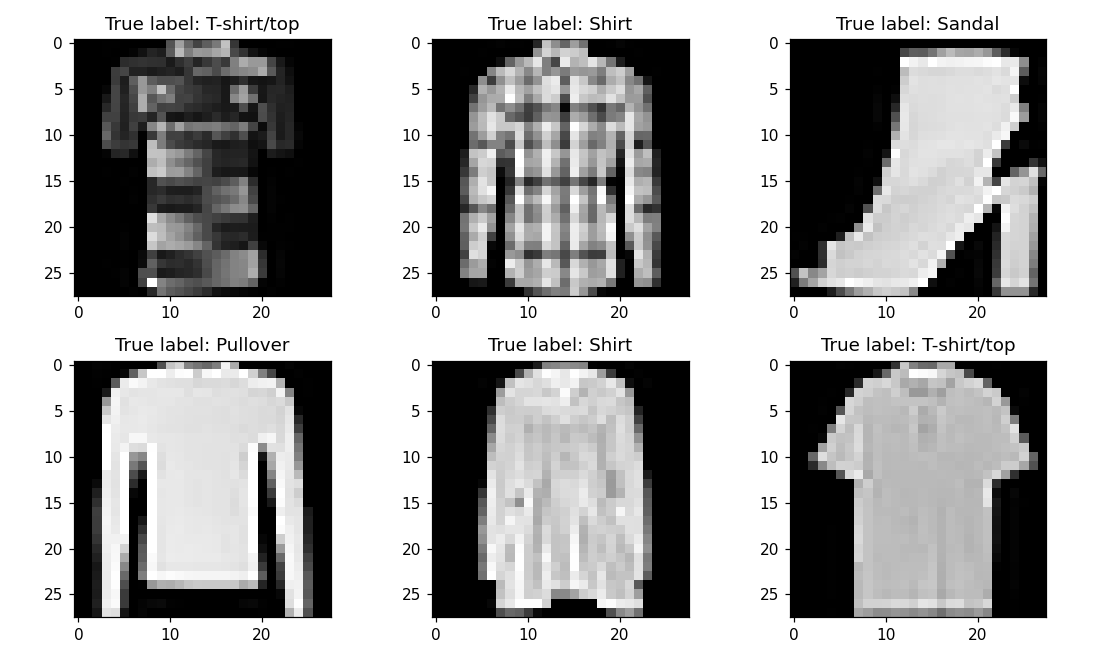

In [31]:
N, H, W = oTrainSet.data.shape
fig, _  = plt.subplots(2, 3, figsize=(10,6))
for ax in fig.axes:
    idx   = np.random.randint(0, N)
    mX, y = oTrainSet[idx]
    ax.imshow(mX.squeeze(), cmap='gray')
    ax.set_title('True label: ' + str(lClasses[y]))
    
plt.tight_layout()
plt.show()

### Compute mean and variance:

In [32]:
mean = oTrainSet.data.float().mean() / 255
std  = oTrainSet.data.float().std () / 255
print('µ =', mean)
print('σ =', std)

µ = tensor(0.2860)
σ = tensor(0.3530)


### Set datasets with normalization:

In [33]:
oTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

oTrainSet.transform = oTransform
oTestSet .transform = oTransform

### Create data loaders:

In [17]:
batchSize = 256
oTrainDL  = torch.utils.data.DataLoader(oTrainSet, shuffle=True,  batch_size=batchSize,   num_workers=2)
oTestDL   = torch.utils.data.DataLoader(oTestSet,  shuffle=False, batch_size=2*batchSize, num_workers=2)

### Define the model (2D CNN):

In [28]:
import torch.nn            as nn
import torch.nn.functional as F
import torch.optim         as optim
import torchsummary

#-- Tensor to vector (reshape):
class Flatten(nn.Module):
    def forward(self, input):
        out = input.view(input.size(0),-1)
        return out

    
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
#-- Model:
def GetModel():
    oModel = nn.Sequential(
        nn.Sequential(), #-- does nothing
        
        nn.Conv2d     (in_channels=1,   out_channels=20,  kernel_size=3, bias=False),
        nn.BatchNorm2d(num_features=20),
        nn.ReLU       (),
        nn.Dropout2d  (p=0.1),
        
        nn.Conv2d     (in_channels=20,  out_channels=40,  kernel_size=3, bias=False),
        nn.MaxPool2d  (kernel_size=2),
        nn.BatchNorm2d(num_features=40),
        nn.ReLU       (),
        nn.Dropout2d  (p=0.1),
                
        nn.Conv2d     (in_channels=40,  out_channels=100, kernel_size=3, bias=False),
        nn.BatchNorm2d(100),
        nn.ReLU(),
        nn.Dropout2d(p=0.1),
        
        nn.Conv2d     (in_channels=100, out_channels=200, kernel_size=3, bias=False),
        nn.BatchNorm2d(200),
        nn.ReLU       (),
        nn.Dropout2d  (p=0.1),
        
        nn.Conv2d     (in_channels=200, out_channels=400, kernel_size=3, bias=False),
        nn.MaxPool2d  (2),
        nn.BatchNorm2d(400),
        nn.ReLU       (),
        
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(400, 10),
    )
    
    return oModel

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
torchsummary.summary(GetModel(), (1, H, W), device='cpu')
print()

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 28, 28]           --
├─Conv2d: 1-2                            [-1, 20, 26, 26]          180
├─BatchNorm2d: 1-3                       [-1, 20, 26, 26]          40
├─ReLU: 1-4                              [-1, 20, 26, 26]          --
├─Dropout2d: 1-5                         [-1, 20, 26, 26]          --
├─Conv2d: 1-6                            [-1, 40, 24, 24]          7,200
├─MaxPool2d: 1-7                         [-1, 40, 12, 12]          --
├─BatchNorm2d: 1-8                       [-1, 40, 12, 12]          80
├─ReLU: 1-9                              [-1, 40, 12, 12]          --
├─Dropout2d: 1-10                        [-1, 40, 12, 12]          --
├─Conv2d: 1-11                           [-1, 100, 10, 10]         36,000
├─BatchNorm2d: 1-12                      [-1, 100, 10, 10]         200
├─ReLU: 1-13                             [-1, 100, 10, 10]         --
├─Drop

### Check whether GPU is available:

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device

device(type='cuda', index=0)

### Train the model:

<IPython.core.display.Javascript object>


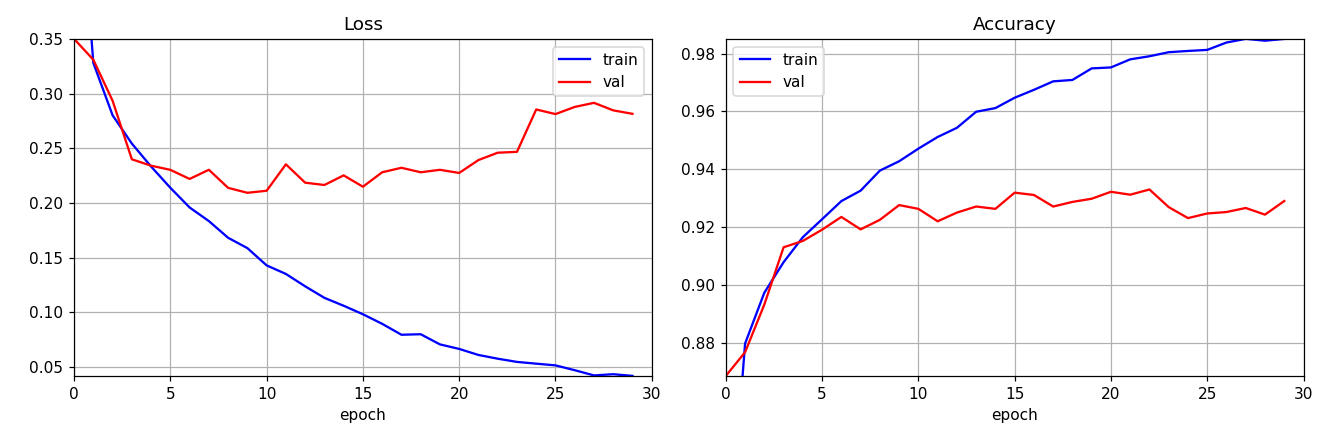

Epoch   0: | Train loss: 0.55619 | Val loss: 0.35015 | Train Accuracy: 0.7940 | Val Accuracy: 0.8685 | epoch time: 13.156 | <-- Checkpoint!
Epoch   1: | Train loss: 0.32812 | Val loss: 0.33107 | Train Accuracy: 0.8797 | Val Accuracy: 0.8767 | epoch time: 11.629 | <-- Checkpoint!
Epoch   2: | Train loss: 0.28025 | Val loss: 0.29355 | Train Accuracy: 0.8973 | Val Accuracy: 0.8932 | epoch time: 11.570 | <-- Checkpoint!
Epoch   3: | Train loss: 0.25439 | Val loss: 0.24002 | Train Accuracy: 0.9079 | Val Accuracy: 0.9130 | epoch time: 11.803 | <-- Checkpoint!
Epoch   4: | Train loss: 0.23340 | Val loss: 0.23416 | Train Accuracy: 0.9165 | Val Accuracy: 0.9152 | epoch time: 11.815 | <-- Checkpoint!
Epoch   5: | Train loss: 0.21395 | Val loss: 0.23038 | Train Accuracy: 0.9227 | Val Accuracy: 0.9191 | epoch time: 11.698 | <-- Checkpoint!
Epoch   6: | Train loss: 0.19596 | Val loss: 0.22206 | Train Accuracy: 0.9290 | Val Accuracy: 0.9235 | epoch time: 11.612 | <-- Checkpoint!
Epoch   7: | Train l

In [30]:
%matplotlib notebook

oModel    = GetModel().to(device)
oOptim    = optim.AdamW(oModel.parameters(), lr=4e-3, betas=(0.9, 0.99), weight_decay=1e-2)
LossFunc  = nn.CrossEntropyLoss()
numEpochs = 30

TrainModel(oModel, oTrainDL, oTestDL, LossFunc, numEpochs, oOptim)